###**SUPERVISED LEARNING FOR 8500 SAMPLES PER CLASS.**

# Import Data for X and y

In [ ]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

In [ ]:
with open('/content/df_features_train8500.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [ ]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,chroma_10,chroma_11,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,targets
bass_synthetic_072-103-050,1,-259.120392,16.254854,-48.653900,56.044502,-48.498081,49.107578,-28.063169,33.163216,-29.868616,...,0.016615,0.021126,18.358565,26.506755,23.400589,24.589065,33.968219,30.536804,70.548043,0
bass_electronic_005-041-075,1,-445.705505,123.459839,62.945370,31.896797,25.574553,24.210548,14.594964,0.539918,-4.144855,...,0.019849,0.042269,29.413068,22.887350,27.154730,28.345323,21.895214,15.876317,38.530831,0
bass_electronic_032-048-050,0,-441.677917,54.611637,19.976978,48.740196,18.194162,17.925045,13.445016,-5.536787,5.831507,...,0.132179,0.135995,34.581794,29.261612,24.449808,21.815215,19.180553,23.966423,53.539505,0
bass_synthetic_084-057-075,1,-267.839111,111.263550,-42.105766,1.328193,-11.390604,8.398848,-12.949695,-7.446430,-16.948307,...,0.103571,0.024353,21.855462,25.989365,31.744667,26.859090,26.837624,23.338994,50.647930,0
bass_synthetic_114-082-127,1,-264.461121,36.348366,-42.848892,43.289532,-22.449223,25.279791,5.725794,35.342300,23.236238,...,0.858397,0.068264,17.983583,16.328056,13.776016,33.808865,28.329224,27.039600,64.354064,0


In [ ]:
df_train.shape

(85000, 162)

In [ ]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [ ]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [ ]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(labels=['targets'], axis=1),
                                                    df_train['targets'],
                                                    test_size=0.05,
                                                    random_state=42)

In [ ]:
X_test.shape

(4250, 161)

In [ ]:
y_test.shape

(4250,)

# Define Confusion Matrix Function

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [ ]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Naive Bayes

In [ ]:
#instantiate the classifier
clf_NB = GaussianNB()

In [ ]:
#Train
clf_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = clf_NB.predict(X_test)
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 18.50%


Normalized confusion matrix
[[0.02760736 0.15030675 0.07055215 0.00920245 0.17791411 0.01533742
  0.06748466 0.03067485 0.41717791 0.03374233]
 [0.         0.55555556 0.02102102 0.00900901 0.003003   0.00600601
  0.00900901 0.01501502 0.38138138 0.        ]
 [0.         0.3374613  0.21981424 0.02167183 0.06811146 0.02167183
  0.05263158 0.13003096 0.14241486 0.00619195]
 [0.00808625 0.29110512 0.01886792 0.02695418 0.13207547 0.01886792
  0.00539084 0.00808625 0.48787062 0.00269542]
 [0.         0.35714286 0.00857143 0.00571429 0.1        0.01714286
  0.00571429 0.00571429 0.5        0.        ]
 [0.         0.23920266 0.01328904 0.0166113  0.07973422 0.02990033
  0.         0.00664452 0.61129568 0.00332226]
 [0.01729107 0.36023055 0.08933718 0.0518732  0.14697406 0.01729107
  0.11239193 0.03746398 0.16138329 0.00576369]
 [0.01298701 0.48311688 0.07012987 0.02077922 0.03376623 0.00519481
  0.03896104 0.10649351 0.21038961 0.01818182]
 [0.         0.30538922 0.00598802 0.0239521  0.0089

<Axes: title={'center': 'Naive Bayes Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

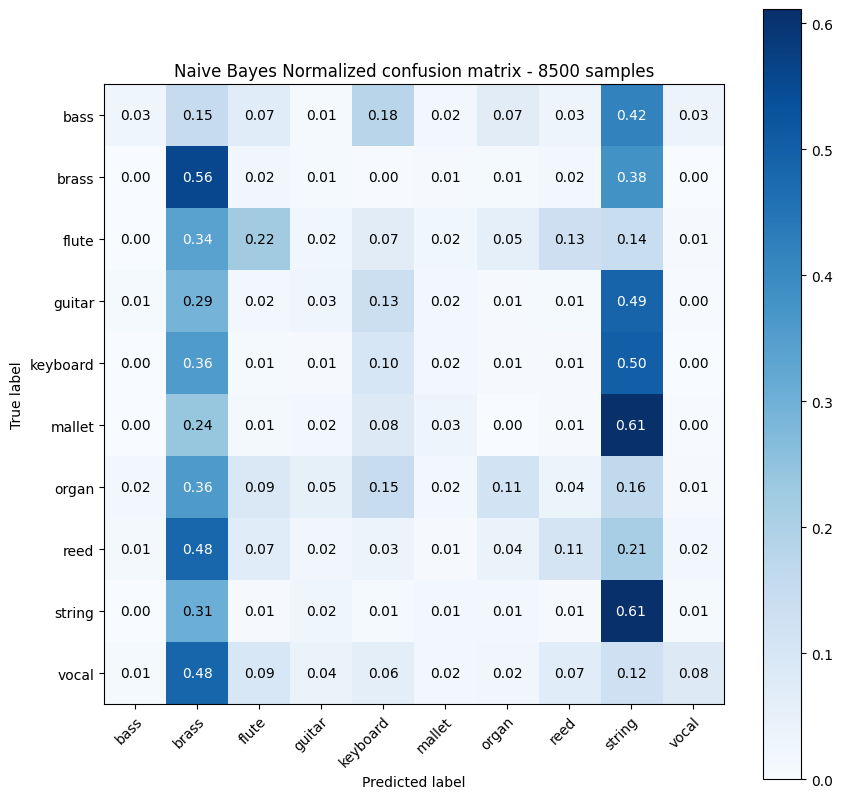

In [ ]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Naive Bayes Normalized confusion matrix - 8500 samples')

# Random Forest - Default Hyperparameters

In [ ]:
#instantiate the random forest
clf_Rf =RandomForestClassifier()

In [ ]:
#Train
clf_Rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = clf_Rf.predict(X_test)
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 91.71%


Normalized confusion matrix
[[0.79754601 0.         0.00306748 0.06134969 0.05214724 0.03680982
  0.01840491 0.01533742 0.00306748 0.01226994]
 [0.         0.97897898 0.00600601 0.         0.         0.
  0.         0.00600601 0.00900901 0.        ]
 [0.         0.         0.98452012 0.         0.00309598 0.
  0.         0.00928793 0.00309598 0.        ]
 [0.03234501 0.00539084 0.         0.84366577 0.04312668 0.05929919
  0.00539084 0.00269542 0.00539084 0.00269542]
 [0.03428571 0.00571429 0.         0.04       0.82       0.06571429
  0.00857143 0.01142857 0.         0.01428571]
 [0.00996678 0.00664452 0.00664452 0.02325581 0.04651163 0.89700997
  0.         0.         0.00332226 0.00664452]
 [0.01440922 0.         0.00288184 0.00288184 0.01152738 0.01729107
  0.94236311 0.00576369 0.         0.00288184]
 [0.01038961 0.01818182 0.01298701 0.         0.0025974  0.
  0.0025974  0.94805195 0.0025974  0.0025974 ]
 [0.00598802 0.00299401 0.00299401 0.00299401 0.         0.00299401
  0.    

<Axes: title={'center': 'Random Forest Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

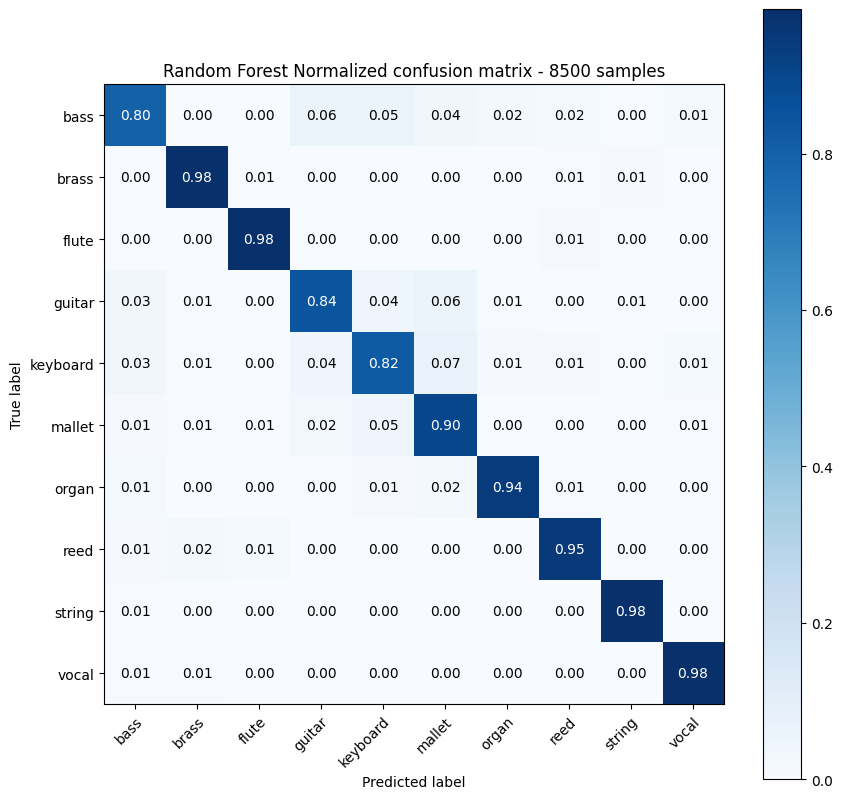

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix - 8500 samples')

# Random Forest - Random Search

In [ ]:
#instantiate the random forest
clf_Rf_RS=RandomForestClassifier()

In [ ]:
param_rs = {
    "n_estimators" : [32, 64, 128, 256, 512],
    "max_depth": [None, 8, 16, 32, 64],
    "max_features": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 10),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
    }

In [ ]:
#Random Search
random_search_RF = RandomizedSearchCV(estimator=clf_Rf_RS,
                                      param_distributions=param_rs,
                                      n_iter=15,
                                      cv=5,
                                      n_jobs=-1,
                                      verbose=2)
#Train
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 8, 16, 32, 64],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cc7cba85cc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cc7cba857b0>,
                                        'n_estimators': [32, 64, 128, 256,
                                                         512]},
                   verbose=2)

In [ ]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=64, max_features=8,
                       min_samples_split=5, n_estimators=512)

In [ ]:
print("Random Search Best Parameters:")
print(random_search_RF.best_params_)

Random Search Best Parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 64, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 512}


In [ ]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest - Random Search is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest - Random Search is 93.12%


Normalized confusion matrix
[[0.82208589 0.00306748 0.00306748 0.04601227 0.05521472 0.0398773
  0.01840491 0.00613497 0.00306748 0.00306748]
 [0.         0.99399399 0.003003   0.         0.         0.
  0.         0.         0.003003   0.        ]
 [0.         0.         0.99071207 0.         0.         0.
  0.         0.00928793 0.         0.        ]
 [0.03234501 0.00269542 0.         0.85983827 0.05390836 0.03773585
  0.00539084 0.         0.00539084 0.00269542]
 [0.02857143 0.00285714 0.         0.04285714 0.83714286 0.05142857
  0.01142857 0.01714286 0.         0.00857143]
 [0.00664452 0.00664452 0.00332226 0.02325581 0.02990033 0.92026578
  0.         0.         0.00332226 0.00664452]
 [0.00576369 0.         0.         0.         0.00864553 0.01440922
  0.95677233 0.01152738 0.         0.00288184]
 [0.01298701 0.01558442 0.01038961 0.         0.0025974  0.
  0.         0.95584416 0.0025974  0.        ]
 [0.00598802 0.         0.         0.         0.00299401 0.
  0.         0.00

<Axes: title={'center': 'Random Forest Randomized Search Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

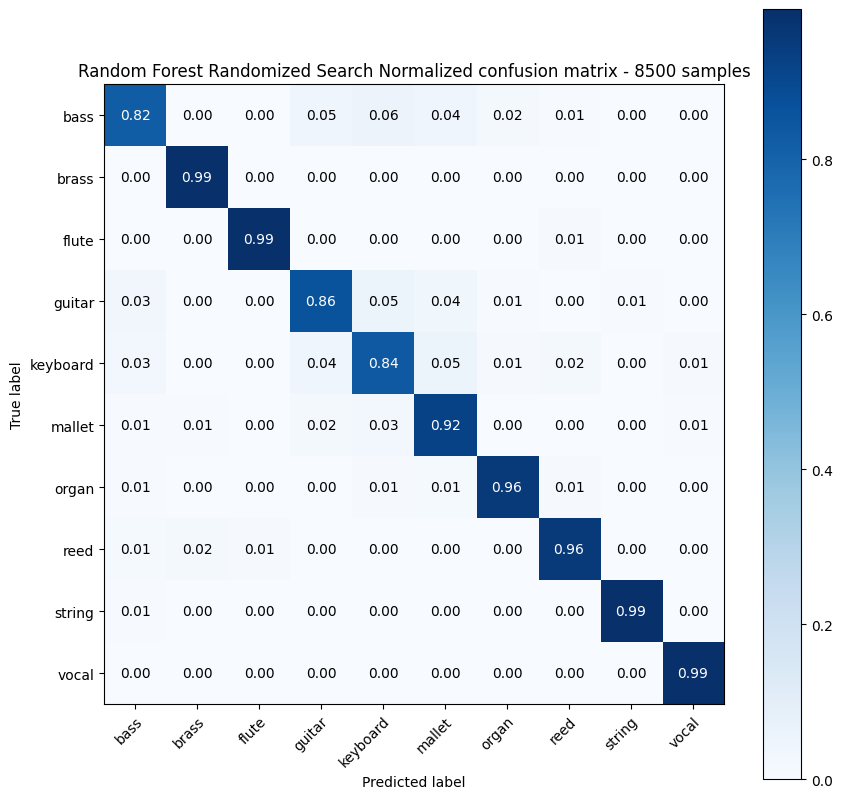

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Random Forest Randomized Search Normalized confusion matrix - 8500 samples')

# SVM

In [ ]:
#Scale and preprocess the data for the SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [ ]:
#instatiate the  classifier
SVM = SVC(C = 10)

In [ ]:
#Train
SVM.fit(X_train_scaled, y_train)

SVC(C=10)

In [ ]:
y_pred_svm = SVM.predict(X_test_scaled)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

The accuracy of SVMs is 75.62%


Normalized confusion matrix
[[0.51084337 0.00481928 0.03855422 0.05301205 0.09638554 0.1373494
  0.04819277 0.02891566 0.04337349 0.03855422]
 [0.00239808 0.92086331 0.         0.00959233 0.00479616 0.
  0.00239808 0.01438849 0.04556355 0.        ]
 [0.01970443 0.00738916 0.84729064 0.00492611 0.00246305 0.00246305
  0.00738916 0.07635468 0.01477833 0.01724138]
 [0.07982262 0.01995565 0.00886918 0.49445676 0.16407982 0.14855876
  0.01330377 0.01330377 0.05099778 0.00665188]
 [0.0738255  0.04474273 0.00223714 0.0738255  0.55257271 0.17002237
  0.02013423 0.02013423 0.03131991 0.01118568]
 [0.05329949 0.00761421 0.01522843 0.03807107 0.06091371 0.75888325
  0.00507614 0.00507614 0.04060914 0.01522843]
 [0.06221198 0.01152074 0.01612903 0.00921659 0.02073733 0.02534562
  0.83870968 0.00230415 0.         0.01382488]
 [0.03687636 0.03904555 0.06941432 0.00433839 0.0021692  0.
  0.0021692  0.81995662 0.01084599 0.01518438]
 [0.01703163 0.01216545 0.         0.00973236 0.01216545 0.01946472
 

<Axes: title={'center': 'SVM Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

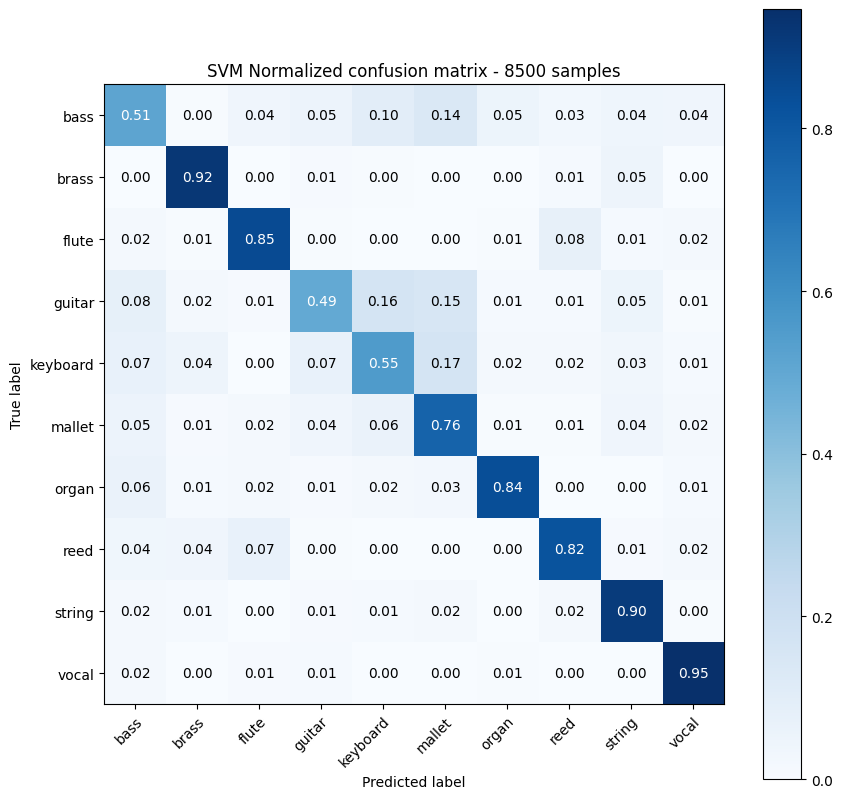

In [ ]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix - 8500 samples')